# Homework 5

## Problem 2

Consider the following IBVP:
$$
\left\{
\begin{array}{ll}
u_t = u_{xx} + \frac{\sin{\pi x}}{1 + t^2}, & x\in (0,2), t\in (0,+\infty)\\[6pt]
u(0,t) = 0.5\cdot\cos{t} \cdot\ln(1+e^{-t}), & t\in (0, +\infty)\\[6pt]
u_x(2,t) = 0, & t\in (0, +\infty)\\[6pt]
u(x,0) = x, & x\in [0, 2]
\end{array}
\right.
$$

For the second BC, one can approximate the derivative by the following formula:


$$u_x(2, t_j) \approx \frac{u(2+ \Delta x, t_j) - u(2, t_j)}{\Delta x} = \frac{u(x_3, t_j) - u(x_2, t_j)}{\Delta x}$$

In this case we will have
$$\frac{u_{3, j} - u_{2, j}}{\Delta x} = 0 \implies u_{3, j} = u_{2, j}$$ as $\Delta x \neq 0$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
alpha = 1
l = 2 
T = 10 

n = 20 
m = 10000 

x = l * np.arange(n+1)/n
t = T * np.arange(m+1)/m
dx = l/n
dt = T/m

r = dt/(dx**2)

Check that stability condition $\alpha^2\frac{\Delta t}{{\Delta x}^2} \leq \frac{1}{2}$ is satisfied:

In [3]:
s = alpha**2 * dt/(dx)**2 
s < 0.5

True

In [4]:
def right(t):
    return 0.5*np.cos(t)*np.log(1 + np.exp(-t))

def initial(x):
    return x

def internal(x, t):
    return (math.sin(math.pi*x)/(1+t**2))

In [5]:
u = np.zeros((n+1, m+1))

In [6]:
u[n,:] = right(t)
u[:,0] = initial(x)

In [7]:
for j in range(m):
    for i in range(1,n):
        u[i,j+1] = u[i,j] + alpha**2 * (dt/(dx)**2) * (u[i+1,j]-2*u[i,j]+u[i,j]) + dt * internal(x[i], t[j])

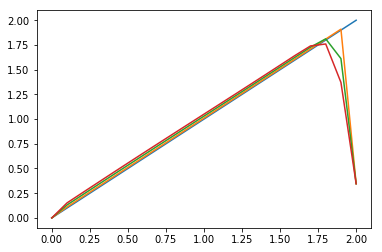

In [8]:
plt.plot(x, u[:,0], x, u[:,1], x, u[:,3], x, u[:,5],)
plt.show()